In [ ]:
# This script provides a basic set up for connecting with the Spotify API and extracting playlist data. This
# will run through:
#    1. Set up - loading packages and authenticating API access.
#    2. Create a function for extracting data from individual playlists.
#    3. Create a function for extracting data from multiple playlists.
#    4. Run those functions, save and export your data. 
    
# This code is based on this article:
# https://towardsdatascience.com/how-to-create-large-music-datasets-using-spotipy-40e7242cc6a6

In [3]:
#%% 1. Set up

# First we need to add certain packages that we'll use in our program. Anaconda comes with most of what 
# we need, but we also need to install Spotipy. In the comand window (bottom right if you're using the default
# layout), type (or copy and paste) the following:
#   conda install -c conda-forge spotipy 
# While you're at it, install this other package as well - we’ll need this for our plots later:
#   conda install -c conda-forge ptitprince
# You may get a note saying that you might need to restart the kernel; to do this, press ctrl . (full stop). 

# Now, we can import our packages.
import csv
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = 'e227ee1cbe94474faabb07ee7ca5b184'
client_secret = '818276b96c034112a97df99e59c08a0a'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# This is the basic Spotipy function to retrieve information for every track in a playlist:
# sp.user_playlist_tracks('CREATOR', 'PLAYLIST_ID')
# Try this on an example:
sp.user_playlist_tracks('Spotify', '37i9dQZF1DWZjqjZMudx9T')
# The output is quite unweildy, so we need to tidy it up.

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWZjqjZMudx9T/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2022-09-02T03:00:00Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/790FomKkXshlbRYZFtlgla'},
       'href': 'https://api.spotify.com/v1/artists/790FomKkXshlbRYZFtlgla',
       'id': '790FomKkXshlbRYZFtlgla',
       'name': 'KAROL G',
       'type': 'artist',
       'uri': 'spotify:artist:790FomKkXshlbRYZFtlgla'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/4IndUOBCZYZg61557iq2A9'},
       'href': 'https://api.spotify.com/v1/artists/4IndUOBCZYZg61557iq2A9',
       'id': '4IndUOBCZYZg61557iq2A9',
      

In [5]:
#%% 2. 

# This will create a function for analysing a single playlist.
def analyse_playlist(creator, playlist_id):

    # Create empty dataframe
    playlist_features_list = ["artist",
        "album",
        "track_name",
        "track_id",
        "release_date",
        "popularity",
        "acousticness",
        "danceability",
        "energy",
        "key",
        "loudness",
        "mode",
        "speechiness",
        "instrumentalness",
        "liveness",
        "valence",
        "tempo",
        "duration_ms",
        "time_signature"]

    playlist_df = pd.DataFrame(columns = playlist_features_list)

    # Loop through every track in the playlist, extract features and append the features to the playlist df
    # Spotify has a limitter on how many tracks you can request at one time, but there's a way around this 
    # setting an offset and a while loop.

    n = 0

    while len(sp.user_playlist_tracks(creator, playlist_id, limit=100, offset=n)["items"]) > 0:

        playlist = sp.user_playlist_tracks(creator, playlist_id, limit=100, offset=n)["items"]
        try:
            for track in playlist:
                # Create empty dict
                playlist_features = {}
                # Get metadata
                playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
                playlist_features["album"] = track["track"]["album"]["name"]
                playlist_features["track_name"] = track["track"]["name"]
                playlist_features["track_id"] = track["track"]["id"]
                playlist_features["release_date"] = track["track"]["album"]["release_date"]
                playlist_features["popularity"] = track["track"]["popularity"]


                # Get audio features
                audio_features = sp.audio_features(playlist_features["track_id"])[0]
                try:
                    for feature in playlist_features_list[6:]:
                        playlist_features[feature] = audio_features[feature]
                except:
                    pass

                # Concat the dfs
                track_df = pd.DataFrame(playlist_features, index = [0])
                playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        except:
            pass

        n += 100

    return playlist_df


# Use the above function to extra data of all tracks in one playlist.
my_playlist_df = analyse_playlist('Spotify', '37i9dQZF1DWZjqjZMudx9T')
my_playlist_df

,artist,album,track_name,track_id,release_date,popularity,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,KAROL G,GATÚBELA,GATÚBELA,1ga4PztXOIw1yBbdUt2X8v,2022-08-26,86,0.26300,0.627,0.858,11,-2.824,0,0.3860,0,0.2100,0.342,92.523,209160,4
1,Rauw Alejandro,LOKERA,LOKERA,79HZAZNnOE97rb2hnI0XQr,2022-07-25,88,0.21000,0.834,0.828,11,-2.657,0,0.0452,0.000006,0.1030,0.580,102.019,195294,4
2,Bad Bunny,Un Verano Sin Ti,Moscow Mule,6Xom58OOXk2SoU711L2IXO,2022-05-06,95,0.29400,0.804,0.674,5,-5.453,0,0.0333,0.000001,0.1150,0.292,99.968,245940,4
3,Mora,MICRODOSIS,LA INOCENTE,5jt25aFjW2kNoBqaEVaz5W,2022-04-01,88,0.30700,0.757,0.789,5,-3.460,0,0.0583,0,0.0717,0.464,91.911,202174,4
4,Myke Towers,Ande Con Quien Ande,Ande Con Quien Ande,6AizmGCrFRQHru1Qf8WKoJ,2022-08-18,78,0.08220,0.825,0.736,7,-5.550,1,0.0913,0,0.1580,0.508,92.028,208735,4
5,Luar La L,L3tra,Caile,6i1g5ZRmJZAkDwBaUZ3f2i,2020-12-18,89,0.29800,0.704,0.756,0,-4.948,1,0.4480,0.000004,0.0852,0.461,121.737,141340,3
6,Rauw Alejandro,Desesperados,Desesperados,6ZOcbKub95XSDESsKKuH41,2021-12-11,84,0.35600,0.869,0.694,1,-3.350,0,0.0783,0.00125,0.0878,0.511,90.020,224997,4
7,Zion & Lennox,Motivando a la Yal,Yo Voy (feat. Daddy Yankee),5gflgO9EPbIBf16n5TKnQS,2004-05-04,85,0.04100,0.808,0.697,10,-5.899,1,0.2410,0,0.0546,0.554,95.060,232020,4
8,Plan B,House Of Pleasure,¿Por Que Te Demoras?,6nAlJuLlRlpAcq30xIqKJs,2010,80,0.03980,0.891,0.780,2,-6.416,0,0.0701,0,0.0548,0.931,95.998,190512,4
9,Maluma,Nos Comemos Vivos,Nos Comemos Vivos,3SlKme42qm1vWrkl3BrZmm,2022-06-09,82,0.16500,0.822,0.719,10,-3.633,0,0.0576,0.000025,0.1740,0.659,82.010,225366,4


In [7]:
#%% 3.

# This will create a function for analysing a dictionary (dict) or list of playlists, using the previous 
# function.
def analyse_playlist_dict(playlist_dict):

    # Loop through every playlist in the dict and analyse it
    for i, (key, val) in enumerate(playlist_dict.items()):
        playlist_df = analyse_playlist(*val)
        # Add a playlist column so that we can see which playlist a track belongs too
        playlist_df["playlist"] = key
        # Create or concat df
        if i == 0:
            playlist_dict_df = playlist_df
        else:
            playlist_dict_df = pd.concat([playlist_dict_df, playlist_df], ignore_index = True)

    return playlist_dict_df

In [8]:
#%% 4. 

# Now we have our functions, we just need to create our playlist dicts.
# Use the following template:
# my_playlist_dict = {'PLAYLIST_NAME' : ('PLAYLIST_CREATOR', 'PLAYLIST_ID')}

# Add as many playlists as you want, separated by a coma. Here is an example of a selection of sleep playlists:
sleep_playlists_dict = {
    'Sleep Piano Music' : ('Pryve', '7xhcF9ddiyF8Skbd1tenro'),
    'Jazz for Sleep' : ('Spotify', '37i9dQZF1DXa1rZf8gLhyz'),
    'LoFi Sleep' : ('Panda Jams', '3DP5Khm13rl3I9mQkgX6fx')
}

# Run our playlists function on the above.
sleep_playlists_df = analyse_playlist_dict(sleep_playlists_dict)

# We can add a column to these to indicate their grouping/categores.
sleep_playlists_df["category"] = "Sleep"

sleep_playlists_df

,artist,album,track_name,track_id,release_date,popularity,acousticness,danceability,energy,key,...,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist,category
0,flavorce,Sunstroke,A Million Thoughts,5Qyt5wxhd5nfYspaiT5hTV,2020-11-26,51,0.996,0.658,0.02110,8,...,1,0.0796,0.970,0.1380,0,70.970,61690,4,Sleep Piano Music,Sleep
1,Mvnday,Open Mind,White Lies,3uUh1YcGhUqkmRUzEqCOiC,2020-10-05,52,0.996,0.643,0.03240,1,...,1,0.1460,0.973,0.1050,0,70.347,65143,4,Sleep Piano Music,Sleep
2,blushful,Shallow Water,All I Ever Wanted,4ybCihmUckfn3u8yOrRqLC,2020-10-05,52,0.996,0.573,0.00152,1,...,1,0.0641,0.973,0.1070,0.898,69.666,69429,3,Sleep Piano Music,Sleep
3,SkySky,Blanket,Long Nap,2M2TSXsNP1l1oW2CFXhgBu,2020-10-05,52,0.995,0.469,0.00128,2,...,1,0.0867,0.978,0.1100,0,70.752,63333,3,Sleep Piano Music,Sleep
4,blushful,Mild Breeze,Be My Valentine - Sleep Edit,685jaRFNHYFbUDoZz5PhK4,2020-11-26,47,0.990,0.469,0.00424,0,...,1,0.0548,0.968,0.1070,0.586,70.074,70714,4,Sleep Piano Music,Sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,morningtime,Fences,Fences,24Fv47pa0QX18GTjJpEPqZ,2022-01-18,39,0.897,0.515,0.33800,7,...,1,0.0263,0.689,0.1490,0.14,75.049,137792,4,LoFi Sleep,Sleep
776,Purrple Cat,Distant Worlds II,Better Days,07OPi6PhHR6mkLP4UDqVtV,2022-02-12,54,0.553,0.702,0.15600,9,...,0,0.0360,0.906,0.0921,0.23,110.003,157659,4,LoFi Sleep,Sleep
777,Stephan Beats,Shigatsu no Ame,Shigatsu no Ame,5obgZYkRhh5b9jS2AM3gYN,2020-04-03,15,0.922,0.496,0.28200,2,...,1,0.0431,0.953,0.1130,0.0386,156.074,134750,4,LoFi Sleep,Sleep
778,after noon,Orchid,Orchid,6DHGdRKVE9dS4UqEktx4Eg,2021-05-07,43,0.952,0.447,0.07830,9,...,1,0.0302,0.860,0.1110,0.215,74.887,153571,4,LoFi Sleep,Sleep


In [9]:
# Add other playlist sets - perhaps you want to compare categories of playlists.
relaxing_playlists_dict = {
    'Ambient Relaxation' : ('Spotify', '37i9dQZF1DX3Ogo9pFvBkY'),
    'Pop Relax' : ('Spotify', '37i9dQZF1DX3SQwW1JbaFt'),
    'Relaxing Classical' : ('Filtr UK', '1ZJpJahEFst7u8njXeGFyv'),
}

# Again, run our function.
relax_playlist_df = analyse_playlist_dict(relaxing_playlists_dict)

# Add category column.
relax_playlist_df["category"] = "Relax"
relax_playlist_df

,artist,album,track_name,track_id,release_date,popularity,acousticness,danceability,energy,key,...,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist,category
0,Calma Interiore,Montania,Montania,6t3e2UfHXGVdxXJhPYj6Lg,2021-09-27,68,0.880,0.2130,0.04290,6,...,0,0.0413,0.724,0.1050,0.1010,69.860,178909,3,Ambient Relaxation,Relax
1,Joanna Neriah,Ethereal,Ethereal,1E8X81mDNXxPlzIWGdwFmg,2021-09-27,67,0.878,0.1720,0.00946,7,...,1,0.0378,0.897,0.1040,0.0343,75.555,226833,3,Ambient Relaxation,Relax
2,Cameron Sinosa,Neblinoso,Neblinoso,6uZF7xC32ewhpsm36IaM5T,2021-09-30,68,0.990,0.1980,0.00582,7,...,1,0.0466,0.914,0.1700,0.0369,73.790,234750,4,Ambient Relaxation,Relax
3,Miesha Berens,Dreaminess,Dreaminess,6FTI1GirXye67U41XkzR2h,2021-10-01,63,0.970,0.0787,0.03470,7,...,1,0.0467,0.944,0.0902,0.0388,74.363,197574,4,Ambient Relaxation,Relax
4,John Sentinela,Center Of Attention,Center Of Attention,1ngTQ4T37HeS0NplRUTX24,2022-02-17,51,0.978,0.1740,0.00813,5,...,0,0.0363,0.845,0.1410,0.0525,140.260,164699,4,Ambient Relaxation,Relax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,Various Artists,Relaxing Classics,"Clarinet Concerto in A Major, K.622: II. Adagio",7adKM9jXaCfnXFxOeZf0OE,2007,17,0.988,0.1180,0.01910,2,...,1,0.0452,0.800,0.0927,0.0766,90.678,461827,3,Relaxing Classical,Relax
480,Erik Satie,Satie Piano Music,"Trois Gymnopédies: l. ""Lent et douloureux""",0Ra0uEmrEtpUOy0dB9OOCZ,1996-06-08,24,0.996,0.4770,0.00765,7,...,1,0.0923,0.959,0.0785,0.3080,76.039,193160,3,Relaxing Classical,Relax
481,Simon Dinnigan,Favourite Guitar Works,Spanish Romance,40pWXzf0b893V7qfuU8w88,1998-07-16,37,0.996,0.4010,0.01330,11,...,0,0.0447,0.899,0.0921,0.0660,102.819,175293,4,Relaxing Classical,Relax
482,Simon Dinnigan,Favourite Guitar Works,Recuerdos de la Alhambra,0uBN8MWZDnMsFEGOIeDz44,1998-07-16,27,0.971,0.0513,0.06420,9,...,1,0.0467,0.881,0.0769,0.2250,73.831,240800,3,Relaxing Classical,Relax


In [10]:
# Let's combine them together into one dataframe.
full_playlists_df = pd.concat([sleep_playlists_df, relax_playlist_df], ignore_index = True)
full_playlists_df

,artist,album,track_name,track_id,release_date,popularity,acousticness,danceability,energy,key,...,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist,category
0,flavorce,Sunstroke,A Million Thoughts,5Qyt5wxhd5nfYspaiT5hTV,2020-11-26,51,0.996,0.6580,0.02110,8,...,1,0.0796,0.970,0.1380,0,70.970,61690,4,Sleep Piano Music,Sleep
1,Mvnday,Open Mind,White Lies,3uUh1YcGhUqkmRUzEqCOiC,2020-10-05,52,0.996,0.6430,0.03240,1,...,1,0.1460,0.973,0.1050,0,70.347,65143,4,Sleep Piano Music,Sleep
2,blushful,Shallow Water,All I Ever Wanted,4ybCihmUckfn3u8yOrRqLC,2020-10-05,52,0.996,0.5730,0.00152,1,...,1,0.0641,0.973,0.1070,0.898,69.666,69429,3,Sleep Piano Music,Sleep
3,SkySky,Blanket,Long Nap,2M2TSXsNP1l1oW2CFXhgBu,2020-10-05,52,0.995,0.4690,0.00128,2,...,1,0.0867,0.978,0.1100,0,70.752,63333,3,Sleep Piano Music,Sleep
4,blushful,Mild Breeze,Be My Valentine - Sleep Edit,685jaRFNHYFbUDoZz5PhK4,2020-11-26,47,0.990,0.4690,0.00424,0,...,1,0.0548,0.968,0.1070,0.586,70.074,70714,4,Sleep Piano Music,Sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,Various Artists,Relaxing Classics,"Clarinet Concerto in A Major, K.622: II. Adagio",7adKM9jXaCfnXFxOeZf0OE,2007,17,0.988,0.1180,0.01910,2,...,1,0.0452,0.800,0.0927,0.0766,90.678,461827,3,Relaxing Classical,Relax
1260,Erik Satie,Satie Piano Music,"Trois Gymnopédies: l. ""Lent et douloureux""",0Ra0uEmrEtpUOy0dB9OOCZ,1996-06-08,24,0.996,0.4770,0.00765,7,...,1,0.0923,0.959,0.0785,0.308,76.039,193160,3,Relaxing Classical,Relax
1261,Simon Dinnigan,Favourite Guitar Works,Spanish Romance,40pWXzf0b893V7qfuU8w88,1998-07-16,37,0.996,0.4010,0.01330,11,...,0,0.0447,0.899,0.0921,0.066,102.819,175293,4,Relaxing Classical,Relax
1262,Simon Dinnigan,Favourite Guitar Works,Recuerdos de la Alhambra,0uBN8MWZDnMsFEGOIeDz44,1998-07-16,27,0.971,0.0513,0.06420,9,...,1,0.0467,0.881,0.0769,0.225,73.831,240800,3,Relaxing Classical,Relax


 # Explore graphs

In [12]:
# plot-related libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import ptitprince as pt

ValueError: object arrays are not supported

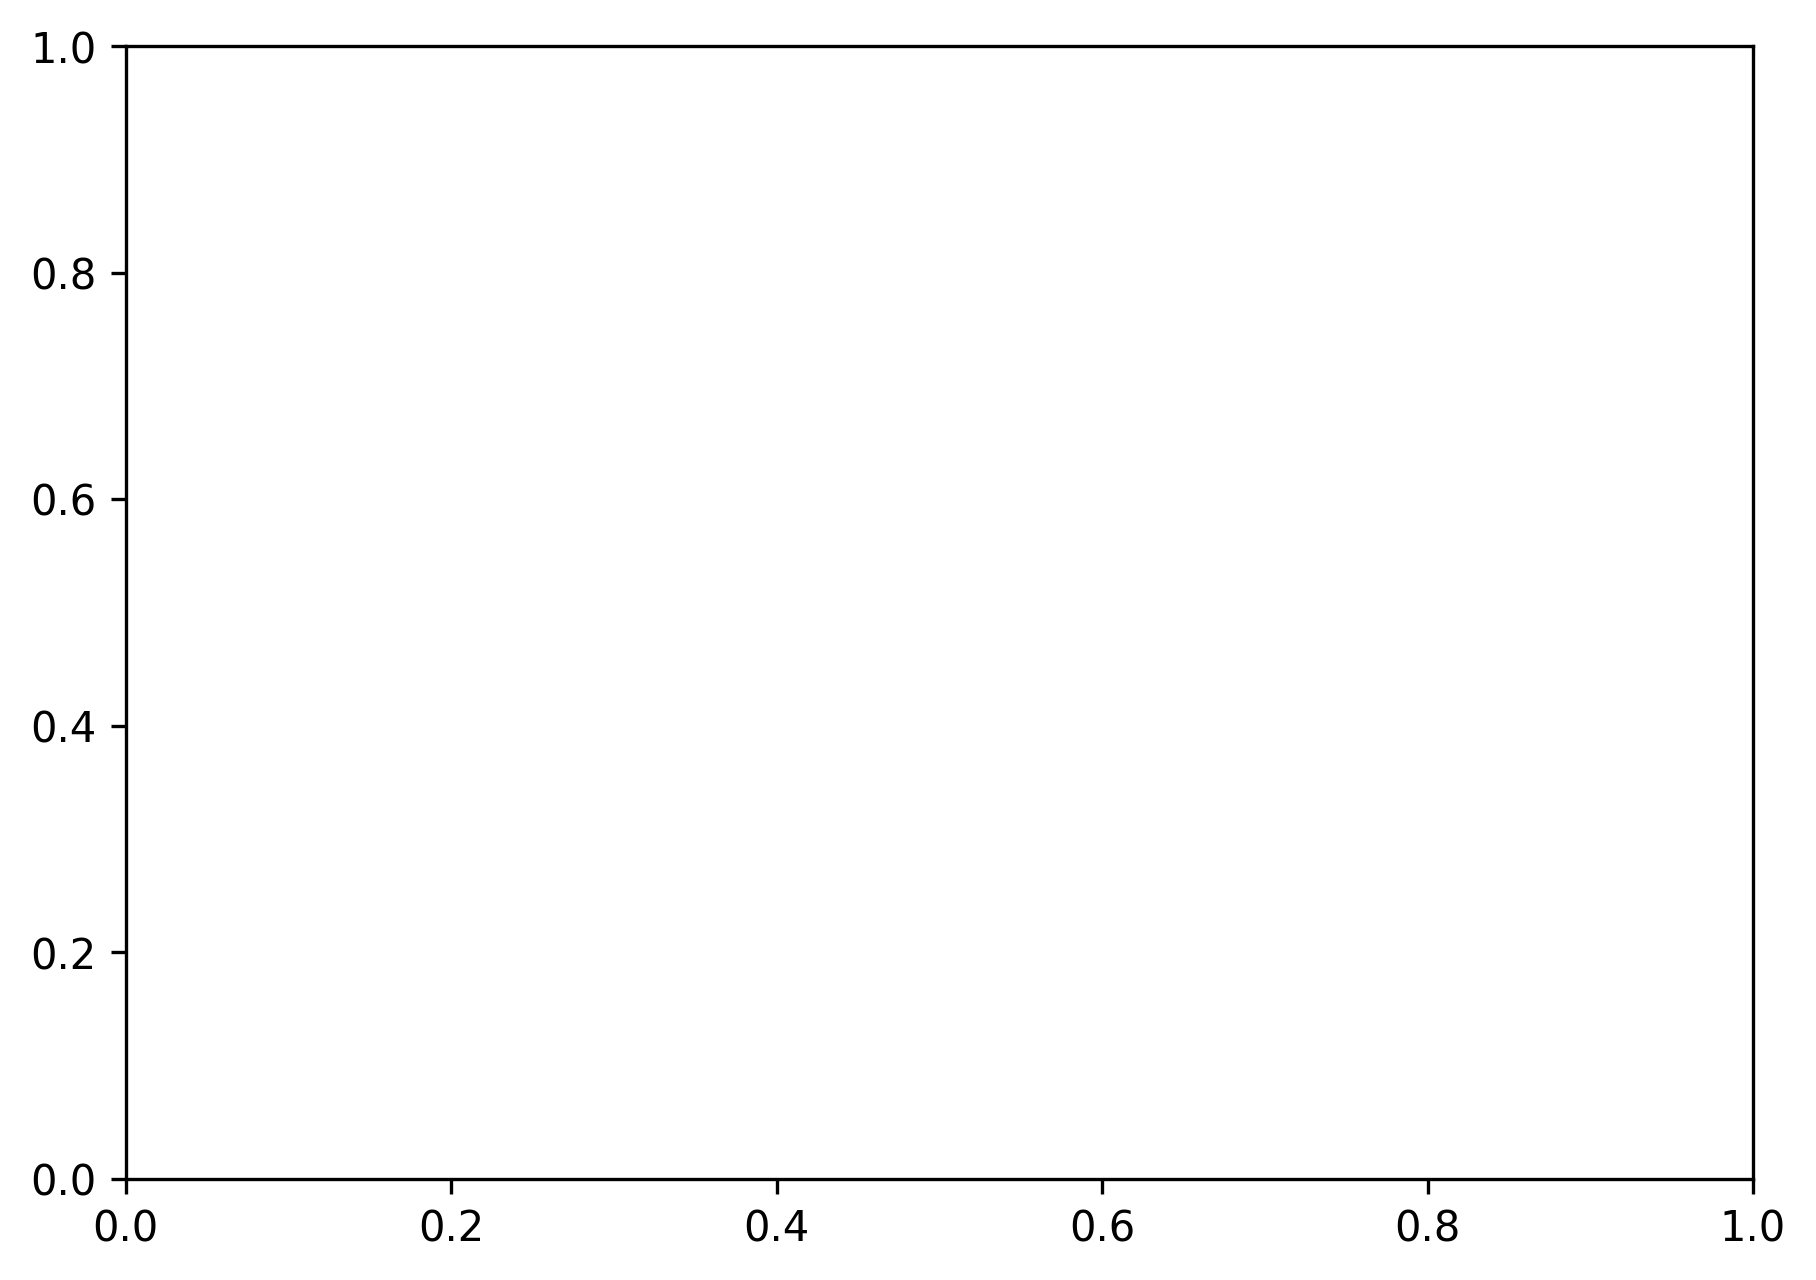

In [17]:
# Subset our dataset to contain only playlist, category, and the audio features.
audiofeatures = full_playlists_df[['playlist',
                         'category',
                         'popularity',
                         'danceability',
                         'energy',
                         'loudness',
                         'speechiness',
                         'acousticness',
                         'instrumentalness',
                         'liveness',
                         'valence',
                         'tempo',
                         'duration_ms']]

# We'll make raincloud plots for most of the audio features by looping through them.
features = ['popularity','danceability','energy','loudness','speechiness','acousticness', 
            'instrumentalness','liveness','valence','tempo', 'duration_ms']

# Make the plots in a loop.
for thisFeature in features:
    # draw the plot
    f, ax = plt.subplots(figsize=(7,5), dpi=300)
    pt.RainCloud(x='playlist', y=thisFeature, data=audiofeatures, palette='Set2', bw=.2, 
                 width_viol=.6, move=.2, ax=ax, orient='h', point_size=.75,
                 box_showfliers = False)
    # add title
    plt.suptitle(thisFeature.capitalize())
    # save the figure
    plt.show(bbox_inches='tight')
    